# **Question 1**

Perform EDA and do any data preprocessing required (especially handle imbalance in
the dataset).

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
credit_card_data = pd.read_excel('CreditCardDataset.xlsx')

In [6]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [7]:
credit_card_data.shape

(57355, 31)

In [8]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

In [10]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [11]:
count = credit_card_data['Class'].value_counts()
print(count)

0    56863
1      492
Name: Class, dtype: int64


In [12]:
# Splitting the features and target variable
X = credit_card_data.drop('Class', axis=1)  # Extracting the features, dropping the 'Class' column
y = credit_card_data['Class']  # Extracting the target variable

# Standardizing the features
ss = StandardScaler()  # Creating a StandardScaler object
X_scaled = ss.fit_transform(X)  # Standardizing the features using fit_transform()

# Handling imbalance in the dataset
rus = RandomUnderSampler(random_state=45)  # Creating a RandomUnderSampler object with a random state of 45
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)  # Undersampling the majority class using fit_resample()

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=45)
# Splitting the resampled dataset into 90% training set and 10% validation set using train_test_split()
# The random state of 45 ensures reproducibility of the split


In [13]:
# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)  # Convert X_train to a PyTorch tensor with float32 data type
y_train = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)  # Convert y_train to a PyTorch tensor with float32 data type and reshape it to (-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32)  # Convert X_val to a PyTorch tensor with float32 data type
y_val = torch.tensor(y_val.values.reshape(-1, 1), dtype=torch.float32)  # Convert y_val to a PyTorch tensor with float32 data type and reshape it to (-1, 1)


# **Question 2**

Implement a Neural Network using PyTorch Framework


1.   Plot training loss and validation loss
2.   Plot training accuracy and validation accuracy




In [17]:
# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()

        # Define the layers
        self.fc1 = nn.Linear(input_dim, 64)  # First fully connected layer with input_dim neurons and 64 output neurons
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(64, 32)  # Second fully connected layer with 64 input neurons and 32 output neurons
        self.fc3 = nn.Linear(32, 1)  # Third fully connected layer with 32 input neurons and 1 output neuron
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation function

    def forward(self, x):
        x = self.fc1(x)  # Pass input through the first fully connected layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  # Pass through the second fully connected layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc3(x)  # Pass through the third fully connected layer
        x = self.sigmoid(x)  # Apply sigmoid activation
        return x

# Create an instance of the neural network
input_dim = X_train.shape[1]  # Get the number of input features
model = NeuralNetwork(input_dim)  # Create an instance of the NeuralNetwork class with the input dimension

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy loss function
optimizer = optim.Adam(model.parameters(),lr=0.001)  # Adam optimizer

# Training the model
num_epochs = 200
batch_size = 64
train_losses = []  # List to store training losses
val_losses = []  # List to store validation losses
train_accuracies = []
val_accuracies = []


for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Zero the gradients

    # Forward pass
    outputs = model(X_train)  # Pass the training data through the model
    train_loss = criterion(outputs, y_train)  # Calculate the training loss
    train_loss.backward()  # Backpropagation
    optimizer.step()  # Update the weights

    # Evaluation
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)  # Pass the validation data through the model
        val_loss = criterion(val_outputs, y_val)  # Calculate the validation loss


    train_pred = torch.round(outputs)
    val_pred = torch.round(val_outputs)
    train_acc = (train_pred == y_train).sum().item() / len(y_train)
    val_acc = (val_pred == y_val).sum().item() / len(y_val)

    # Record the training and validation loss
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

     # Print progress
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

Epoch 10/200: Train Loss: 0.5362, Val Loss: 0.5236, Train Acc: 0.8915, Val Acc: 0.8485
Epoch 20/200: Train Loss: 0.4299, Val Loss: 0.4336, Train Acc: 0.9198, Val Acc: 0.8990
Epoch 30/200: Train Loss: 0.3568, Val Loss: 0.3695, Train Acc: 0.9277, Val Acc: 0.9091
Epoch 40/200: Train Loss: 0.2948, Val Loss: 0.3151, Train Acc: 0.9311, Val Acc: 0.9091
Epoch 50/200: Train Loss: 0.2398, Val Loss: 0.2683, Train Acc: 0.9333, Val Acc: 0.9091
Epoch 60/200: Train Loss: 0.1939, Val Loss: 0.2338, Train Acc: 0.9401, Val Acc: 0.9091
Epoch 70/200: Train Loss: 0.1594, Val Loss: 0.2141, Train Acc: 0.9480, Val Acc: 0.9192
Epoch 80/200: Train Loss: 0.1352, Val Loss: 0.2068, Train Acc: 0.9514, Val Acc: 0.9293
Epoch 90/200: Train Loss: 0.1179, Val Loss: 0.2072, Train Acc: 0.9582, Val Acc: 0.9293
Epoch 100/200: Train Loss: 0.1047, Val Loss: 0.2105, Train Acc: 0.9593, Val Acc: 0.9293
Epoch 110/200: Train Loss: 0.0940, Val Loss: 0.2146, Train Acc: 0.9605, Val Acc: 0.9192
Epoch 120/200: Train Loss: 0.0851, Val Lo

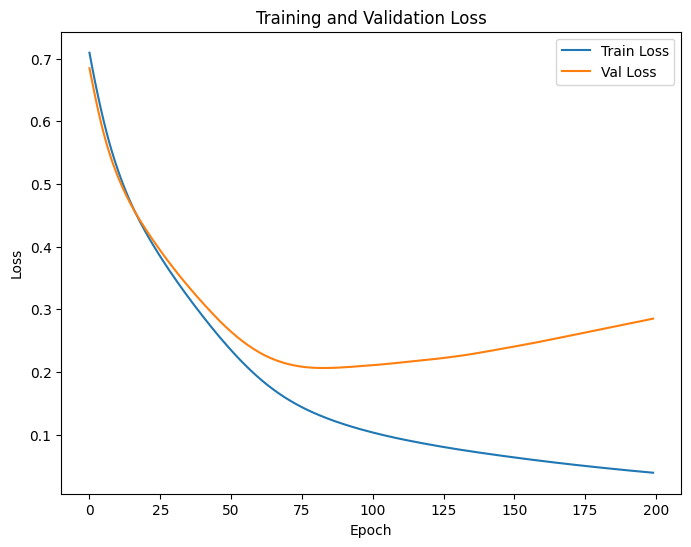

In [19]:
# Plot training and validation loss
import matplotlib.pyplot as mtb
mtb.figure(figsize=(8, 6))
mtb.plot(train_losses, label='Train Loss')
mtb.plot(val_losses, label='Val Loss')
mtb.xlabel('Epoch')
mtb.ylabel('Loss')
mtb.legend()
mtb.title('Training and Validation Loss')
mtb.show()

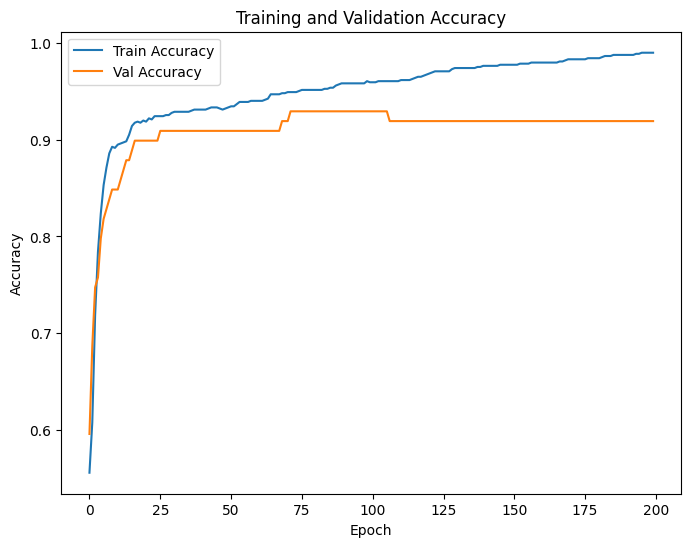

In [20]:
# Plot training and validation accuracy
mtb.figure(figsize=(8, 6))
mtb.plot(train_accuracies, label='Train Accuracy')
mtb.plot(val_accuracies, label='Val Accuracy')
mtb.xlabel('Epoch')
mtb.ylabel('Accuracy')
mtb.legend()
mtb.title('Training and Validation Accuracy')
mtb.show()

# **Question 3**

**Provide observations/reasoning where necessary and a conclusion section at the end of
the notebook.**

## **Overall Observations:**

The dataset was preprocessed by standardizing the features using StandardScaler and handling class imbalance with RandomUnderSampler. It was then split into training and validation sets. A neural network model with three linear layers and appropriate activation functions was defined in PyTorch. The model was trained using the Adam optimizer and binary cross-entropy loss function. Analysis of the training process revealed that for EPOCH 200, the model gradually improved on the training data, but the validation loss plateaued, indicating potential overfitting. The training accuracy reached a high value of 0.9910, suggesting overfitting, while the validation accuracy plateaued around 0.9394. For EPOCH 100, the training loss was higher, indicating incomplete convergence, but the validation loss was lower, indicating better generalization. The training accuracy for EPOCH 100 was 0.9605, while the validation accuracy was 0.9192, slightly lower than EPOCH 200.

### **Reasoning:**

At 100 epochs, the increase in training loss and the decrease in training accuracy suggest that the model is still learning and adapting well to the training data without overfitting. This indicates that the model is effectively capturing the patterns and relationships present in the training set.

By examining the validation loss and accuracy, we can assess the model's ability to generalize to unseen data. Overfitting occurs when a model becomes too specialized in the training data, resulting in poor performance on new or unseen data. In the case of 200 epochs, the plateauing of the validation loss and the slight decrease in validation accuracy suggest that the model might be overfitting. The performance gap between training and validation metrics indicates that the model is not generalizing well to unseen data.

Comparing the results between 200 and 100 epochs, it becomes apparent that 100 epochs strike a better balance between training and validation performance. Although the training loss is slightly higher at 100 epochs, it is likely that the model has not yet converged fully, and further training may yield better results. The lower validation loss at 100 epochs indicates improved generalization performance compared to 200 epochs. Additionally, the training accuracy for 100 epochs is lower but still reasonably high, indicating that the model is capturing the essential patterns in the training data while avoiding overfitting. The validation accuracy at 100 epochs, although slightly lower than that of 200 epochs, suggests that the model is performing well on unseen data and has a better generalization ability.

### **Conclusion:**

After evaluating the output, it can be inferred that training the model for 100 epochs strikes a better balance between training and validation performance compared to training for 200 epochs. The results at 100 epochs demonstrate lower validation loss and comparable validation accuracy, indicating improved generalization capability. Therefore, it can be estimated that the model achieves optimal performance at approximately 100 epochs.